## Insurance Data set

### Problem Statement
    This dataset contains information on the insurance claim. each observation is different policyholder with various
    features like the age of the person,the gender of the policyholder,body mass index,providing an understanding of 
    the body, number of children of the policyholder,smoking state of the policyholder and individual medical costs
    billed by health insurance
    
    Here, First we will do EDA with different plots of distribution and correlation,based on that we will try to predict
    the insurance claim by Using Proper model.

### Import neccesary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

### Data Loading

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


### Data Shape

In [4]:
df.shape

(1338, 8)

* Data has 1338 rows and 8 columns

### Data Size

In [5]:
df.size

10704

### Data Describe

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


### Checking for null values

In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

* Data has no missing values

## Distribution plots

1) Age

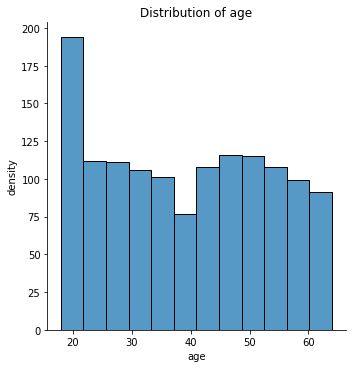

In [8]:
sns.displot(df['age'])
plt.title("Distribution of age")
plt.xlabel('age')
plt.ylabel('density')
plt.show()

2)bmi

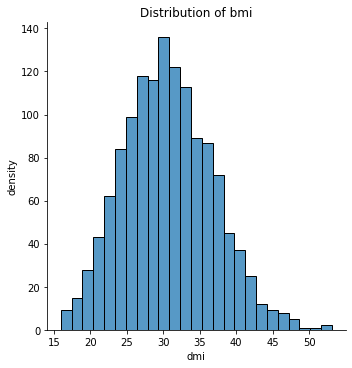

In [9]:
sns.displot(df['bmi'])
plt.title("Distribution of bmi")
plt.xlabel('dmi')
plt.ylabel('density')
plt.show()

3) Charges

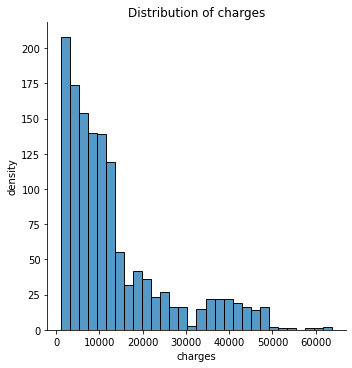

In [10]:
sns.displot(df['charges'])
plt.title("Distribution of charges")
plt.xlabel('charges')
plt.ylabel('density')
plt.show()

### Count plots

1) Childrens

In [11]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

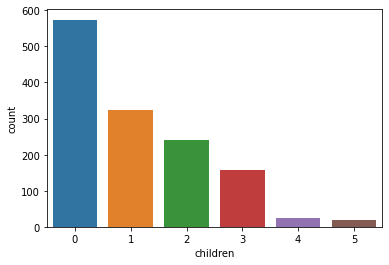

In [12]:
sns.countplot(x ='children', data = df)
plt.show()

2) Sex

In [13]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

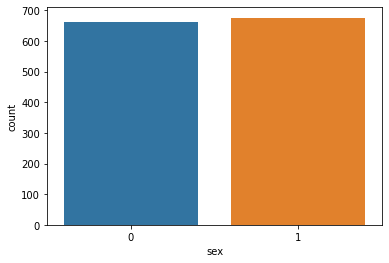

In [14]:
sns.countplot(x ='sex', data = df)
plt.show()

3) Smokers

In [15]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

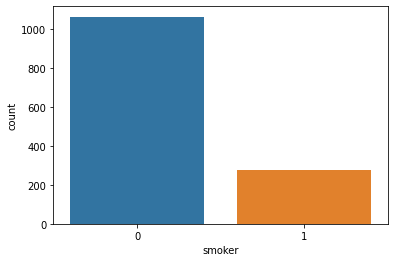

In [16]:
sns.countplot(x ='smoker', data = df)
plt.show()

4) region

In [17]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

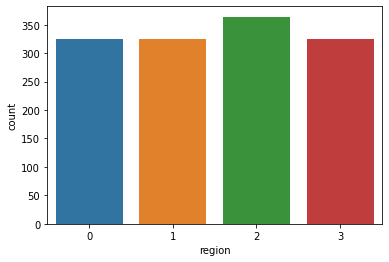

In [18]:
sns.countplot(x ='region', data = df)
plt.show()

## Correlation checking

In [19]:
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges           1.000000
insuranceclaim    0.309418
age               0.299008
bmi               0.198341
children          0.067998
sex               0.057292
region            0.006208
smoker           -0.787251
Name: charges, dtype: float64

## Correlation plot

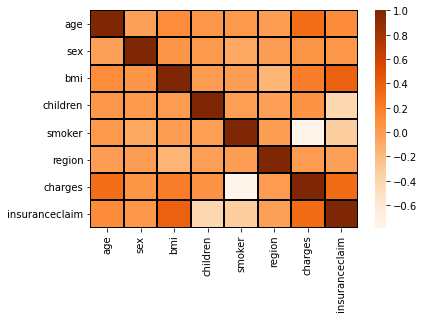

In [20]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Oranges', linecolor='black', linewidths= 2 )
plt.show()

## Pair plot

<Figure size 432x288 with 0 Axes>

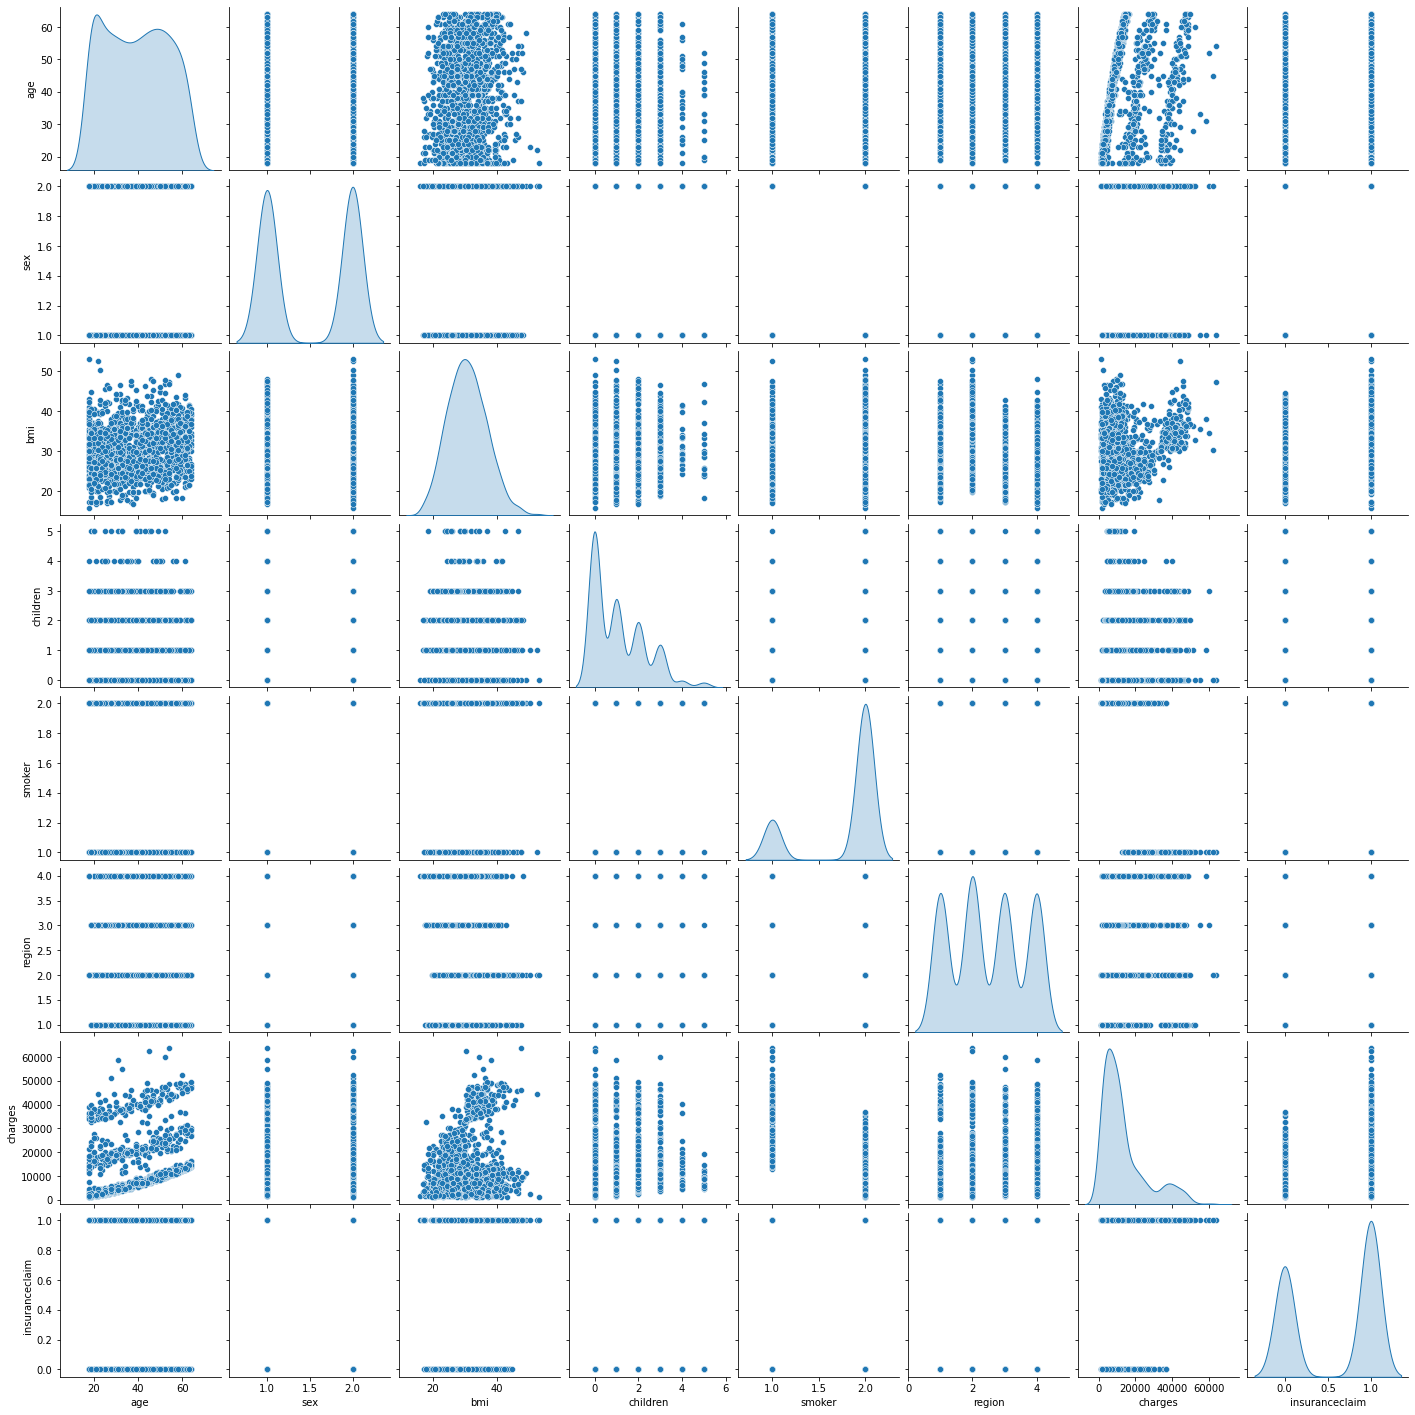

In [21]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

## implimentation of data to find best model with best accuracy

In [22]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

***The target column is insuranceclaim***

* Target variable : insurance claim
* Yes:1 
* No:0


* Based on the Target this is the pure example of classifiaction problem, therfore we will use machine learning models like,
    * 1) Logistic regression
    * 2) Naive bayes
    * 3) Random Forest
    * 4) Decision Tree
    * 5) Support Vector Machine
    * 6) Knn
    * 7) Adaboost
    * 8) XG boost
      
  and will find out the best model with best accuracy




## 1)Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [25]:
X = df.drop('insuranceclaim', axis = 1)
y = df['insuranceclaim']

### Train test split

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (936, 7)
X_test : (402, 7)
y_train : (936,)
y_test : (402,)


In [28]:
y_train=y_train.values.reshape(y_train.shape[0],1)
y_test=y_test.values.reshape(y_test.shape[0],1)

In [29]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (936, 7)
X_test : (402, 7)
y_train : (936, 1)
y_test : (402, 1)


### Scaling

In [30]:
# Scaling (To transform all datapoints in to a one scale)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)


In [31]:
#model

lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)

c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
y_pred=lr.predict(X_test_scaled)
y_pred =pd.DataFrame(y_pred)

In [33]:
# Mean absolute error

MAE= metrics.mean_absolute_error(y_test, y_pred)

# Mean squared error

MSE= metrics.mean_squared_error(y_test, y_pred)

# Root mean sqaured error

RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE',"RMSE"],columns=['Metrics'])

,Metrics
MAE,0.124378
MSE,0.124378
RMSE,0.352673


In [34]:
# Trainig Accuracy
accuracyTR= lr.score(X_train_scaled,y_train)

In [35]:
accuracyTR

0.8846153846153846

In [36]:
# Testing Accuracy
accuracyTE = lr.score(X_test_scaled,y_test)

In [37]:
accuracyTE

0.8756218905472637

### The Accuracy obtaind by Logistic regression on Training data is 88 % while on Testing Data accuracy is 87 %

# 2) Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
#model
nb1 = GaussianNB()
nb1.fit(X_train_scaled,y_train)

c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [40]:
# Trainign accuracy
accuracyTR=nb1.score(X_train_scaled,y_train)

In [41]:
accuracyTR

0.719017094017094

In [42]:
# Testing accuracy
accuracyTE= nb1.score(X_test_scaled,y_test)

In [43]:
accuracyTE

0.7114427860696517

### The Accuracy obtaind by Naive Bayes on Training data and testing data  is same which is  71%

# 3) Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
# RF model 

rf=RandomForestRegressor(n_estimators=1000,random_state=42)

#fit model 

rf.fit(X_train_scaled,y_train)

C:\Users\com\AppData\Local\Temp\ipykernel_7252\3956964908.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [46]:
# Prediction

y_pred=rf.predict(X_test_scaled)
y_pred

array([0.036, 1.   , 1.   , 0.58 , 1.   , 0.829, 0.   , 1.   , 0.77 ,
       0.849, 0.014, 0.239, 0.008, 1.   , 1.   , 0.997, 0.718, 1.   ,
       0.316, 1.   , 0.044, 0.32 , 1.   , 1.   , 0.951, 1.   , 1.   ,
       0.018, 0.785, 1.   , 0.096, 1.   , 1.   , 0.   , 0.007, 1.   ,
       0.001, 0.776, 0.999, 0.998, 0.002, 0.816, 0.992, 0.047, 0.013,
       0.071, 0.008, 0.   , 0.997, 0.005, 1.   , 0.033, 0.794, 0.988,
       1.   , 0.159, 0.022, 0.998, 1.   , 1.   , 1.   , 0.308, 0.082,
       0.011, 1.   , 0.004, 0.02 , 0.859, 0.   , 1.   , 0.101, 0.103,
       1.   , 0.012, 0.884, 1.   , 0.013, 0.028, 0.003, 0.535, 1.   ,
       1.   , 0.001, 0.994, 0.994, 1.   , 0.008, 1.   , 0.231, 0.02 ,
       0.849, 0.994, 0.959, 0.   , 0.999, 0.314, 0.959, 1.   , 0.027,
       0.   , 0.001, 1.   , 1.   , 0.027, 0.003, 0.264, 0.369, 0.998,
       0.   , 0.999, 1.   , 0.967, 0.736, 0.999, 0.812, 0.966, 1.   ,
       0.793, 0.   , 0.003, 0.979, 0.439, 0.907, 1.   , 0.   , 0.268,
       0.993, 0.556,

In [47]:
# Mean absolute error

MAE= metrics.mean_absolute_error(y_test, y_pred)

# Mean squared error

MSE= metrics.mean_squared_error(y_test, y_pred)

# Root mean sqaured error

RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE',"RMSE"],columns=['Metrics'])

,Metrics
MAE,0.057306
MSE,0.021824
RMSE,0.147730


In [48]:
#Training accuracy
accuracyTR = rf.score(X_train_scaled,y_train)

In [49]:
accuracyTR

0.9901623309045273

In [50]:
# Test_accuracy
accuracyTE = rf.score(X_test_scaled,y_test)

In [51]:
accuracyTE

0.9091034392412567

### The Accuracy obtaind by Random Forest on Training data is  99%,Where as on testing data it is 90%.The model looks like overfitted.

# 4) Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
# Model
reg = DecisionTreeRegressor()
# fitting
reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [54]:
# prediction
y_pred = reg.predict(X_test_scaled)
y_pred

array([0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1.

In [55]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
397,1.0
398,1.0
399,1.0
400,1.0


In [56]:
# Mean absolute error

MAE= metrics.mean_absolute_error(y_test, y_pred)

# Mean squared error

MSE= metrics.mean_squared_error(y_test, y_pred)

# Root mean sqaured error

RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE',"RMSE"],columns=['Metrics'])

,Metrics
MAE,0.034826
MSE,0.034826
RMSE,0.186617


In [57]:
# Testing accuracy 
accuracyTR=reg.score(X_train_scaled,y_train)

accuracyTR

1.0

In [58]:
# Training accuracy 

accuracyTE=reg.score(X_test_scaled,y_test)

accuracyTE

0.8549521919538157

### The Accuracy obtaind by Decision Tree on Training data is  100%,Where as on testing data it is 86%.

# 5) Support Vector machine

In [59]:
from sklearn.svm import SVC

In [60]:
#model
clf = SVC(kernel ='rbf',random_state = 0)
clf.fit(X_train_scaled,y_train)

c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [61]:
# Prediction
y_pred = clf.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [62]:
# Mean absolute error

MAE= metrics.mean_absolute_error(y_test, y_pred)

# Mean squared error

MSE= metrics.mean_squared_error(y_test, y_pred)

# Root mean sqaured error

RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE',"RMSE"],columns=['Metrics'])

,Metrics
MAE,0.104478
MSE,0.104478
RMSE,0.323230


In [63]:
# accuracy Training

accuracy_score=clf.score(X_train_scaled,y_train)

accuracyTR

1.0

In [64]:
# accuracy Testing

accuracy_score=clf.score(X_test_scaled,y_test)

accuracyTR

1.0

### The Support Vector machine shows 100% Accuracy on the scaled data, it means that the model is overfitted.

# 6)Knn

In [65]:
from sklearn.neighbors import KNeighborsClassifier 

In [66]:
# Consider different values of k

np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [68]:
# for single value of k

# set up a model
knn= KNeighborsClassifier(n_neighbors = 3)

# fit the model
knn.fit(X_train_scaled,y_train)

# comput acuuracy on traning set
acc_k3_TR = knn.score(X_train_scaled,y_train)
print('Traning data accuracy :',acc_k3_TR)

# comput acuuracy on testing set
acc_k3_TE = knn.score(X_test_scaled,y_test)
print('Testing data accuracy :',acc_k3_TE)

c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Traning data accuracy : 0.9476495726495726
Testing data accuracy : 0.8830845771144279


In [69]:
# multiple values of k

neighbors = np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [70]:
for i ,k in enumerate(neighbors):
    # set up model
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # fit the model
    knn.fit(X_train_scaled,y_train)
    
    #compute accuracy on traning set
    train_accuracy[i] = knn.score(X_train_scaled,y_train)
    
    #compute accuracy on testing set
    test_accuracy[i] = knn.score(X_test_scaled,y_test)

c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversi

In [71]:
train_accuracy

array([1.        , 0.9465812 , 0.94764957, 0.93055556, 0.92735043,
       0.91346154, 0.92521368, 0.90491453, 0.90705128])

In [72]:
test_accuracy

array([0.88557214, 0.86318408, 0.88308458, 0.8880597 , 0.8880597 ,
       0.88308458, 0.88308458, 0.87064677, 0.89054726])

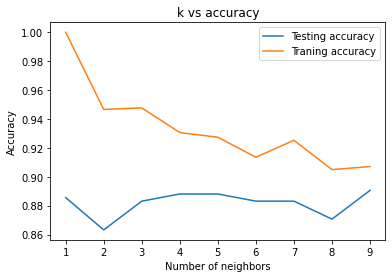

In [73]:
# plot train test accuracy

plt.plot(neighbors,test_accuracy,label='Testing accuracy')
plt.plot(neighbors,train_accuracy,label='Traning accuracy')
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("k vs accuracy")
plt.show()



### As shown in graph plot we can see the training accuracy is decreasing over the no of K values while the test accuracies are stable

# 7) XG boost

In [74]:
from xgboost import XGBClassifier

In [75]:
# fit model on traning data

model=XGBClassifier()
model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [76]:
y_pred=model.predict(X_test_scaled)
y_pred=pd.DataFrame(y_pred)

In [77]:
# Mean absolute error

MAE= metrics.mean_absolute_error(y_test, y_pred)

# Mean squared error

MSE= metrics.mean_squared_error(y_test, y_pred)

# Root mean sqaured error

RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE',"RMSE"],columns=['Metrics'])

,Metrics
MAE,0.022388
MSE,0.022388
RMSE,0.149626


In [78]:
# Trainig Accuracy
accuracyTR =model.score(X_train_scaled,y_train)
accuracyTR

1.0

In [79]:
# Testing accuracy
accuracyTE =model.score(X_test_scaled,y_test)
accuracyTE 


0.9776119402985075

### The Accuracy obtaind by XGboost on Training data is  100%,Where as on testing data it is 97%. Here we can say that the model is overfitted

# 8) ADA boost

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [81]:
adb_clf = AdaBoostClassifier()

In [82]:
adb_clf.fit(X_train_scaled, y_train)

c:\users\com\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [83]:
#Prediction

y_pred = adb_clf.predict(X_test_scaled)

In [84]:
# Mean absolute error

MAE= metrics.mean_absolute_error(y_test, y_pred)

# Mean squared error

MSE= metrics.mean_squared_error(y_test, y_pred)

# Root mean sqaured error

RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE',"RMSE"],columns=['Metrics'])

,Metrics
MAE,0.139303
MSE,0.139303
RMSE,0.373234


In [85]:
# Trainig Accuracy
accuracyTR =adb_clf.score(X_train_scaled,y_train)
accuracyTR

0.8942307692307693

In [86]:
# Testing Accuracy
accuracyTE =adb_clf.score(X_test_scaled,y_test)
accuracyTE

0.8606965174129353

### The Accuracy obtaind by ADAboost on Training data is  89%,Where as on testing data it is 86%.